In [2]:
import oss2
import json
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

with open("../aliyun_key.json" ,'r') as key:
    AccessKeyDict=json.loads(key.read())
AccessKeyId=AccessKeyDict["AccessKeyId"]
AccessKeySecret=AccessKeyDict["AccessKeySecret"]
auth = oss2.Auth(AccessKeyId, AccessKeySecret)
bucket = oss2.Bucket(auth, 'https://oss-cn-shanghai.aliyuncs.com', 'ocr-yjs')
from aliyunsdkcore.client import AcsClient
from aliyunsdkcore.acs_exception.exceptions import ClientException
from aliyunsdkcore.acs_exception.exceptions import ServerException
from aliyunsdkcore.auth.credentials import AccessKeyCredential
from aliyunsdkcore.auth.credentials import StsTokenCredential
credentials = AccessKeyCredential(AccessKeyId, AccessKeySecret)
client = AcsClient(region_id='cn-shanghai', credential=credentials)
import seaborn as sns

In [35]:
"""

https://help.aliyun.com/document_detail/159212.html
人体检测
人体检测可以检测图像中的所有人体，并返回每个人体的矩形框位置

"""

from aliyunsdkfacebody.request.v20191230.DetectPedestrianRequest import DetectPedestrianRequest

request = DetectPedestrianRequest()
request.set_accept_format('json')

filepath="images/manyperson2.jpg"
with open(filepath, 'rb') as fileobj:
    bucket.put_object(filepath, fileobj)
url="https://ocr-yjs.oss-cn-shanghai.aliyuncs.com/"+filepath
request.set_ImageURL(url)

response = client.do_action_with_exception(request)
response=json.loads(str(response, encoding='utf-8'))
print(response)

{'RequestId': 'DAE77D50-9A29-55DF-BB72-B5332A0A188E', 'Data': {'Height': 154, 'Elements': [{'Score': 0.9454946517944336, 'Type': 'person', 'Boxes': [221, 4, 288, 154]}, {'Score': 0.9368643760681152, 'Type': 'person', 'Boxes': [273, 0, 327, 154]}, {'Score': 0.9234395027160645, 'Type': 'person', 'Boxes': [138, 19, 192, 153]}, {'Score': 0.9109735488891602, 'Type': 'person', 'Boxes': [0, 0, 55, 154]}, {'Score': 0.8831648826599121, 'Type': 'person', 'Boxes': [92, 20, 140, 153]}, {'Score': 0.8630275726318359, 'Type': 'person', 'Boxes': [39, 8, 100, 154]}, {'Score': 0.580146312713623, 'Type': 'person', 'Boxes': [141, 3, 236, 154]}], 'Width': 327}}


In [36]:
Height=response['Data']['Height']
Width=response['Data']['Width']

In [37]:
response['Data']['Elements']

[{'Score': 0.9454946517944336, 'Type': 'person', 'Boxes': [221, 4, 288, 154]},
 {'Score': 0.9368643760681152, 'Type': 'person', 'Boxes': [273, 0, 327, 154]},
 {'Score': 0.9234395027160645, 'Type': 'person', 'Boxes': [138, 19, 192, 153]},
 {'Score': 0.9109735488891602, 'Type': 'person', 'Boxes': [0, 0, 55, 154]},
 {'Score': 0.8831648826599121, 'Type': 'person', 'Boxes': [92, 20, 140, 153]},
 {'Score': 0.8630275726318359, 'Type': 'person', 'Boxes': [39, 8, 100, 154]},
 {'Score': 0.580146312713623, 'Type': 'person', 'Boxes': [141, 3, 236, 154]}]

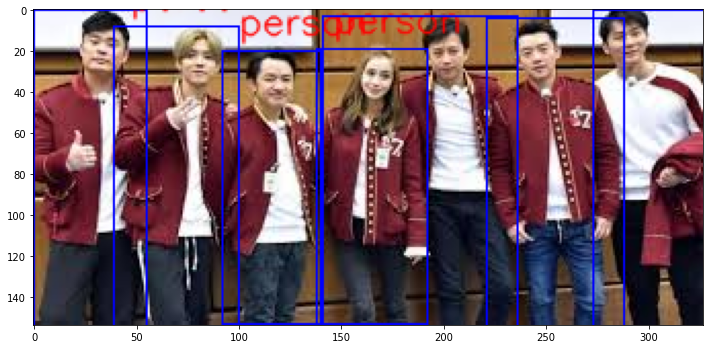

In [40]:
# left, top, right, bottom
plt.figure(figsize=(12,10))
res=plt.imread(filepath)
font = cv2.FONT_HERSHEY_SIMPLEX

for data in response['Data']['Elements']:
    Type=data["Type"]
    left=(data['Boxes'][0],data['Boxes'][1])
    bottom=(data['Boxes'][2],data['Boxes'][3])
    cv2.putText(res,Type,(data['Boxes'][0]+8,data['Boxes'][1]-8), font, 0.6,(255,0,0),1,cv2.LINE_AA)
    res=cv2.rectangle(res,left,bottom,(0,0,255),1)
plt.imshow(res)